In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [ ]:
bank = pd.read_csv("bank_marketing_part1_Data.csv")

In [ ]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [ ]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
bank.duplicated().sum()

0

In [ ]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

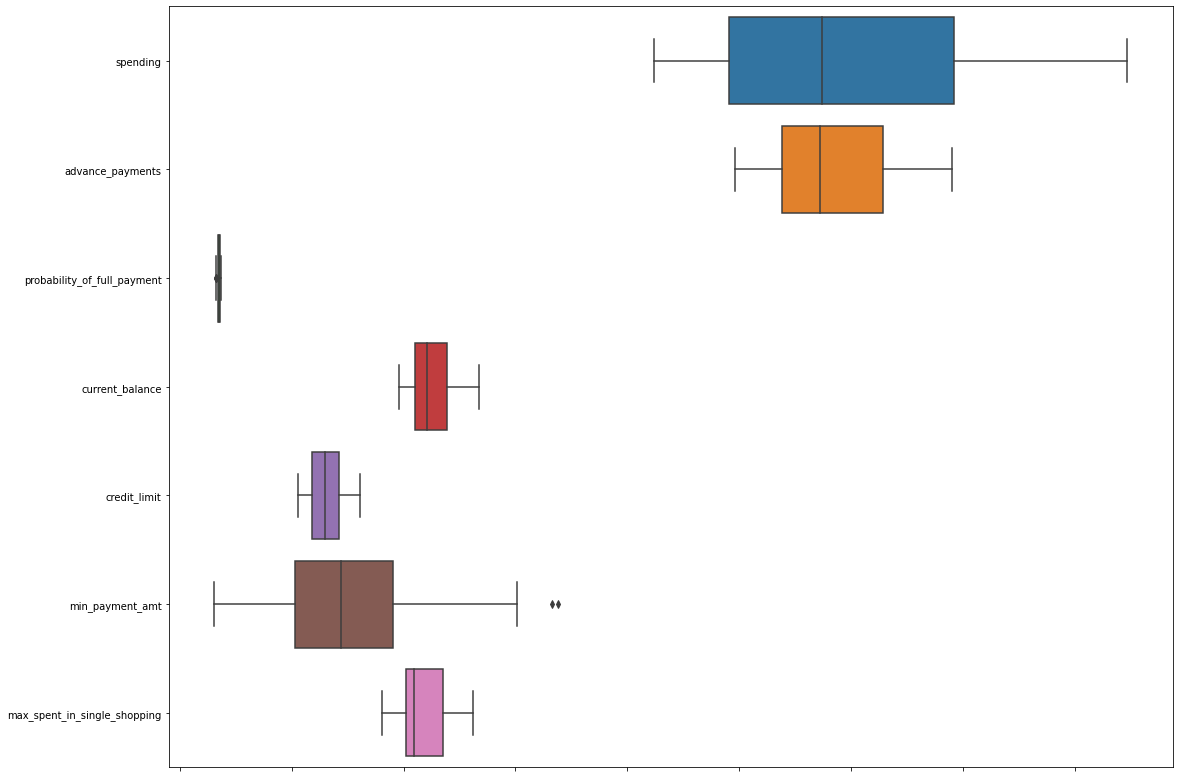

In [ ]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=bank,orient='h')
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

<Figure size 1080x1080 with 0 Axes>

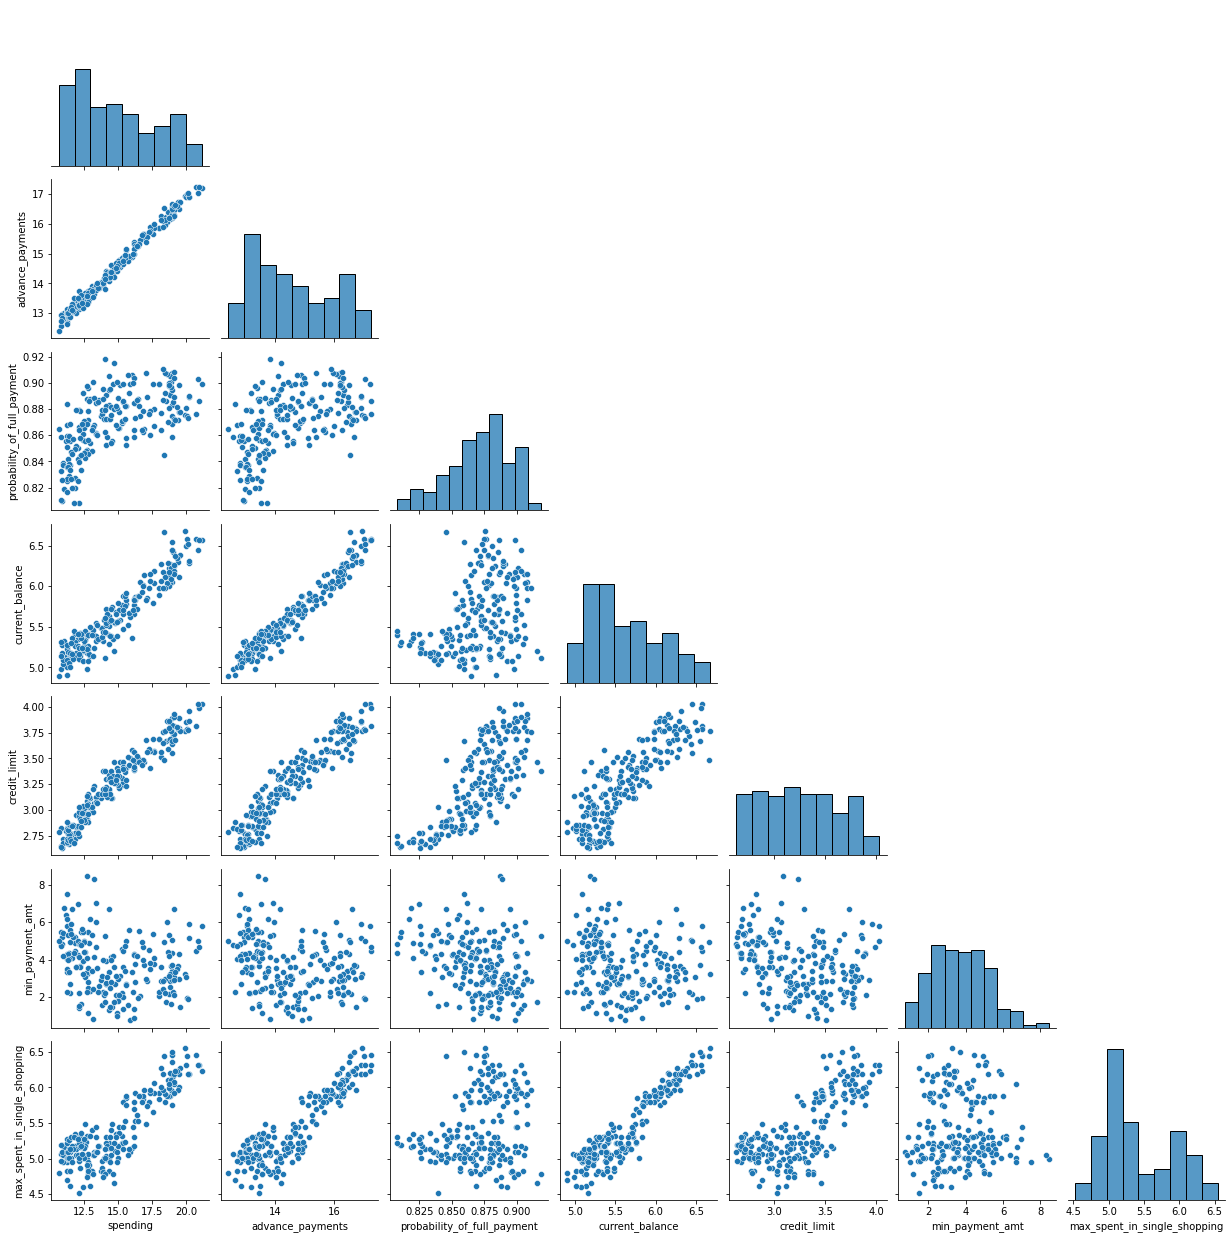

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(bank, corner=True)


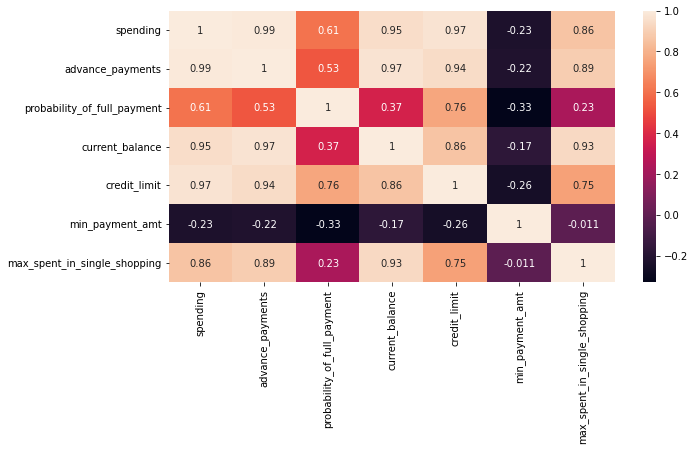

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(bank.corr(),annot=True)


1.2  Do you think scaling is necessary for clustering in this case? Justify

Scaling needs to be done as the values of the variables are different. spending, advance_payments are in different values and this may get more weightage. We will use Zscore for this.




In [ ]:
from scipy.stats import zscore

In [ ]:
bank=bank.apply(zscore)

In [ ]:
bank.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [ ]:
bank.describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.008667e-16,1.184238e-16,1.243450e-15,-1.057355e-16,-3.267228e-16,5.244482e-16,-1.937075e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


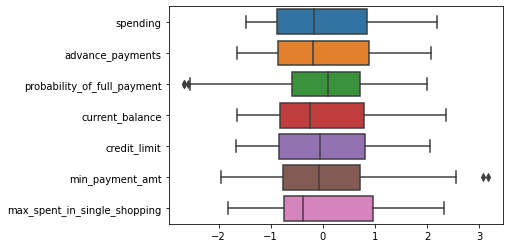

In [ ]:
sns.boxplot(data=bank,orient='h'
           )


###From the boxplot we can see that there are 2 columns for which outliers exist. We will treat those values with min & max value of IQR

In [ ]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(bank[col],[25,75])
    IQR=Q3-Q1
    Qmin=Q1-1.5*IQR
    Qmax=Q3+1.5*IQR
    bank[col]=np.where(bank[col] < Qmin,Qmin,bank[col])
    bank[col]=np.where(bank[col] > Qmax,Qmax,bank[col])


In [ ]:
for col in bank.columns:
    outlier_treatment(col)


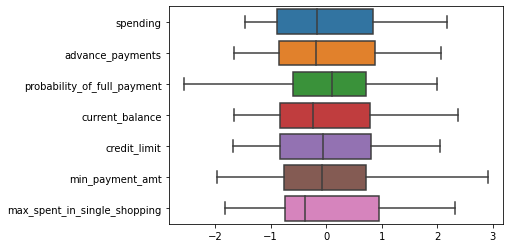

In [ ]:
sns.boxplot(data=bank,orient='h'
           )

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
wardlink = linkage(bank, method = 'ward')

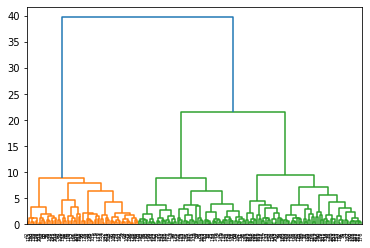

In [ ]:
dend = dendrogram(wardlink)

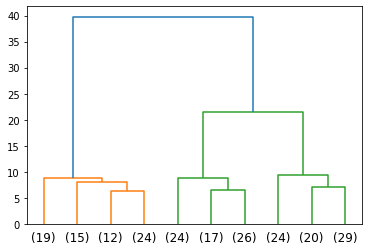

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

From the dendogram, we can see that whole data could be divided into 2 clusters. Let us explore the data in both the cluster in below steps.


In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [ ]:
# Method 2

clusters = fcluster(wardlink, 23, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
bank1=pd.read_csv("bank_marketing_part1_Data.csv")

In [ ]:
bank1['clusters'] = clusters

In [ ]:
bank1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [ ]:
bank1.to_csv('hc.csv')

# Observations
- The customer belonging to cluster 1 has higher spending habit as compared to cluster2

- Customer from cluster 1 are better at advance_payments than cluster 2.

- Customer from cluster 1 are spending more in single shopping.

- There is a marginal difference between credit_limit.



1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means=KMeans(n_clusters=3)

In [ ]:
k_means.fit(bank)


KMeans(n_clusters=3)

In [ ]:
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2], dtype=int32)

In [ ]:
k_means.inertia_

427.9772167395369

In [ ]:
k_means=KMeans(n_clusters=2)
k_means.fit(bank)
k_means.inertia_

655.6870659927685

In [ ]:
wss=[]

In [ ]:
for i in range(1,9):
    k_means=KMeans(n_clusters=i)
    k_means=k_means.fit(bank)
    wss.append(k_means.inertia_)


In [ ]:
wss

[1466.2981569540955,
 655.6870659927685,
 427.9772167395369,
 368.6684519373563,
 325.26604219746605,
 288.0761054375397,
 260.3712489271374,
 238.91796184149217]

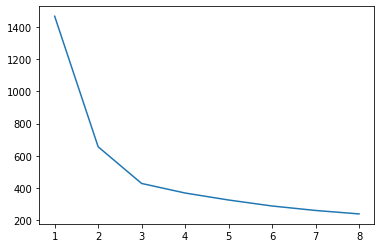

In [ ]:
plt.plot(range(1,9), wss)

In [ ]:
k_means=KMeans(n_clusters=2)
k_means=k_means.fit(bank)
labels=k_means.labels_
labels


array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
bank2=pd.read_csv("bank_marketing_part1_Data.csv")

In [ ]:
bank2['Klabels']=labels

In [ ]:
bank2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
silhouette_score(bank,labels)
bank2['silhouette_samples']=silhouette_samples(bank,labels)
bank2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.603653
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.010025
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.677866
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.497757
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.547713


In [ ]:
bank2.describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.366667,0.466450
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.483046,0.165480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000,-0.004726
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000,0.378326
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000,0.523122
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000,0.590010
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000,0.677866


In [ ]:
bank2[bank2['silhouette_samples'] < 0].count()

spending                        1
advance_payments                1
probability_of_full_payment     1
current_balance                 1
credit_limit                    1
min_payment_amt                 1
max_spent_in_single_shopping    1
Klabels                         1
silhouette_samples              1
dtype: int64

In [ ]:
bank2[bank2['Klabels'] == 1].describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000
mean,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,1.0,0.510474
std,1.483999,0.641792,0.015177,0.257327,0.186514,1.281527,0.294989,0.0,0.163995
min,15.380000,14.860000,0.845200,5.618000,3.231000,0.765100,5.091000,1.0,0.013436
25%,16.840000,15.550000,0.873500,5.920000,3.505000,2.553000,5.837000,1.0,0.444495
50%,18.550000,16.180000,0.882900,6.113000,3.684000,3.368000,5.965000,1.0,0.583673
75%,19.110000,16.500000,0.898400,6.285000,3.796000,4.391000,6.185000,1.0,0.624837
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,1.0,0.677866


In [ ]:
bank2[bank2['Klabels'] == 0].describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000
mean,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,0.0,0.440963
std,1.428131,0.635028,0.024497,0.208434,0.238913,1.609146,0.199294,0.0,0.161517
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.855100,4.519000,0.0,-0.004726
25%,11.750000,13.190000,0.847300,5.176000,2.821000,2.587000,4.963000,0.0,0.352698
50%,12.720000,13.570000,0.865700,5.333000,3.026000,3.638000,5.089000,0.0,0.495250
75%,14.110000,14.210000,0.881900,5.479000,3.201000,4.924000,5.220000,0.0,0.568622
max,15.990000,14.940000,0.918300,5.789000,3.582000,8.456000,5.491000,0.0,0.616961


In [ ]:
bank2[bank2['silhouette_samples'] < 0]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
102,15.38,14.66,0.899,5.477,3.465,3.6,5.439,0,-0.004726


In [ ]:
k_means=KMeans(n_clusters=3)
k_means=k_means.fit(bank)
labels=k_means.labels_
labels


array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
bank3=pd.read_csv("bank_marketing_part1_Data.csv")

In [ ]:
k_means=KMeans(n_clusters=3)
k_means=k_means.fit(bank)
labels=k_means.labels_
bank3['Klabels']=labels
silhouette_score(bank,labels)
bank3['silhouette_samples']=silhouette_samples(bank,labels)
bank3.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.515791
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [ ]:
bank3['silhouette_samples'].describe()


count    210.000000
mean       0.401160
std        0.167702
min        0.003972
25%        0.296053
50%        0.462502
75%        0.524456
max        0.639285
Name: silhouette_samples, dtype: float64

In [ ]:
bank3[bank3['silhouette_samples'] < 0]


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples


1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.



In [ ]:
bank3[bank3['Klabels'] == 0].describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000
mean,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.0,0.468772
std,1.277122,0.546439,0.014917,0.237807,0.166014,1.211052,0.229566,0.0,0.153712
min,15.560000,14.890000,0.845200,5.718000,3.387000,1.472000,5.484000,0.0,0.029792
25%,17.590000,15.855000,0.874650,6.011500,3.564500,2.848000,5.879000,0.0,0.419827
50%,18.750000,16.230000,0.882900,6.153000,3.719000,3.619000,6.009000,0.0,0.523482
75%,19.145000,16.580000,0.898050,6.328000,3.808000,4.421000,6.192500,0.0,0.574340
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,0.0,0.639285


In [ ]:
bank3[bank3['Klabels'] == 1].describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000
mean,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,1.0,0.399972
std,0.714801,0.355208,0.019953,0.141795,0.138689,1.354711,0.184012,0.0,0.159150
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.502000,4.519000,1.0,0.005537
25%,11.255000,12.992500,0.835000,5.139250,2.738500,4.032250,5.001000,1.0,0.317377
50%,11.825000,13.250000,0.848600,5.225000,2.836500,4.799000,5.089000,1.0,0.460288
75%,12.395000,13.482500,0.861475,5.337250,2.967000,5.463750,5.223500,1.0,0.517004
max,13.340000,13.950000,0.888300,5.541000,3.232000,8.456000,5.491000,1.0,0.588916


In [ ]:
bank3[bank3['Klabels'] == 2].describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000
mean,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.0,0.338561
std,1.056513,0.525706,0.015502,0.225266,0.154766,1.176440,0.269558,0.0,0.166285
min,12.080000,13.150000,0.852700,4.984000,2.936000,0.765100,4.605000,2.0,0.003972
25%,13.820000,14.030000,0.871300,5.380000,3.155000,1.951000,4.958500,2.0,0.234095
50%,14.430000,14.390000,0.881900,5.541000,3.258000,2.640000,5.132000,2.0,0.369179
75%,15.260000,14.760000,0.893350,5.689500,3.378000,3.332000,5.263500,2.0,0.478993
max,16.440000,15.270000,0.918300,5.920000,3.582000,6.685000,5.879000,2.0,0.552946


Observations
People from cluster 2 are spending the most, followed by cluster 0. Cluster 1 has lowest spending.

Credit limit for customers in cluster 2 is highest,followed by cluster 0 and then cluster 1. Credit limit for cluster 1 can be increased.

Current balance for cluster 1 and cluster 0 is quite less as compared to cluster 2. Hence, saving plans can be introduced


Max spent in single shopping for cluster 0 & 1 is less. Rewards & Cashback  can be introduced to promote the max spents above certail order value
